In [1]:
import numpy as np

## Data generation for K-Means

In [2]:
np.random.randn(10, 2) + np.array([10, 20])

array([[ 9.14759045, 20.95793402],
       [ 8.60899117, 18.87741216],
       [ 8.55276261, 18.67575625],
       [11.23658988, 20.53352458],
       [ 9.3898359 , 21.08163759],
       [10.07978666, 19.55949691],
       [ 8.99176874, 20.26486673],
       [11.48240612, 19.24992266],
       [ 9.35824336, 22.05813655],
       [ 9.36820021, 19.71343411]])

In [3]:
np.random.seed(0)
N = 2000

data1 = np.random.randn(N//3, 2) + np.array([2, 2])
data2 = np.random.randn(N//3, 2) + np.array([-3, -3])
data3 = np.random.randn(N//3, 2) + np.array([-5, 3])

X = np.concatenate((data1, data2, data3), axis=0)

## Visualize Data

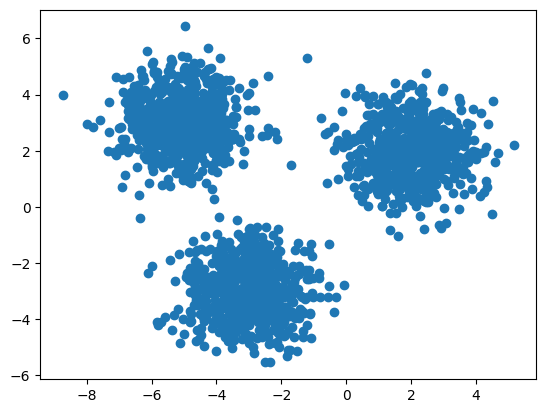

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1]);

In [5]:
k = 3

random_indices = np.random.randint(0, X.shape[0], 3)
random_indices

array([ 718,  566, 1499])

In [6]:
cluster_centres = X[random_indices]
cluster_centres

array([[-2.1908197 , -4.19809288],
       [ 2.82455722,  2.53117837],
       [-6.21251574,  2.91940148]])

## Visualize the clusters centres as well

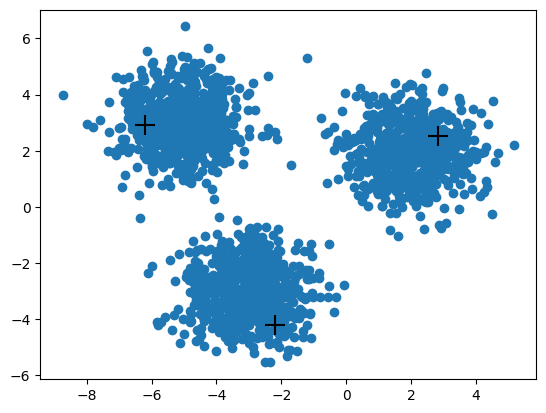

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], marker='+', s=200, c='k')

## Assign data-points to these three clusters (Store this information in the cluster indicator (z))

In [8]:
def identify_cluster_of_each_data_point(X, cluster_centres):

  z = np.array([])
  for each in X:
    dist_from_each_centre = [np.linalg.norm(each-cluster_centres[i]) for i in range(len(cluster_centres))]
    chosen_cluster = np.argmin(dist_from_each_centre)
    z = np.append(z, chosen_cluster)
  return z

In [9]:
z = identify_cluster_of_each_data_point(X, cluster_centres)
z

array([1., 1., 1., ..., 2., 2., 2.])

## Visualize this clusters formed as per this z

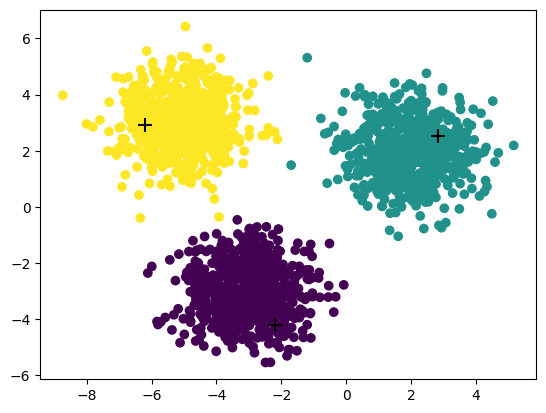

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = z)
plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], marker = "+", s = 100, c = 'k');

## Compute updated cluster centres

In [11]:
z == 2

array([False, False, False, ...,  True,  True,  True])

In [12]:
def compute_cluster_centres(X, z, k):
  return np.array([np.mean(X[z == i], axis=0) for i in range(k)])

In [13]:
compute_cluster_centres(X, z, k)

array([[-3.043441  , -2.9886384 ],
       [ 1.97820946,  1.96453641],
       [-5.09121122,  2.99986439]])

## Iterations in K-Means Clustering

In the context of K-Means clustering, there are two primary iterations that occur in each cycle:

(a) Re-assigning Data Points to New Clusters:
   - In this step, each data point is reassigned to the cluster whose center is closest to it. This is done based on a distance metric, often the Euclidean distance, to determine which cluster a data point belongs to. The data points are redistributed among clusters, aiming to minimize the distance between data points and their respective cluster centers.

(b) Re-compute Cluster Centers:
   - After data points have been reassigned to clusters, the cluster centers are recalculated. The new cluster centers are determined as the mean (average) of the data points that belong to each cluster. This step involves updating the center of each cluster to reflect the current distribution of data points within that cluster.

These two steps are repeated iteratively in the K-Means algorithm until convergence, which means that data points stop changing clusters or the change in cluster assignments becomes negligible. The goal is to find cluster centers that minimize the within-cluster variance, effectively grouping data points into coherent clusters.

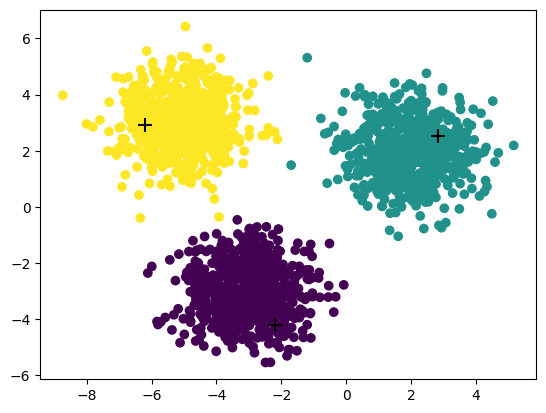

[[-3.043441   -2.9886384 ]
 [ 1.97820946  1.96453641]
 [-5.09121122  2.99986439]]


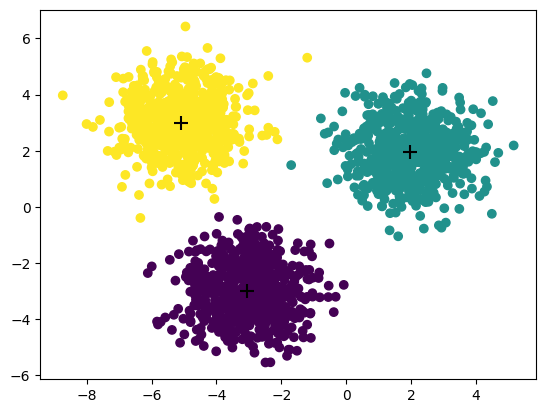

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


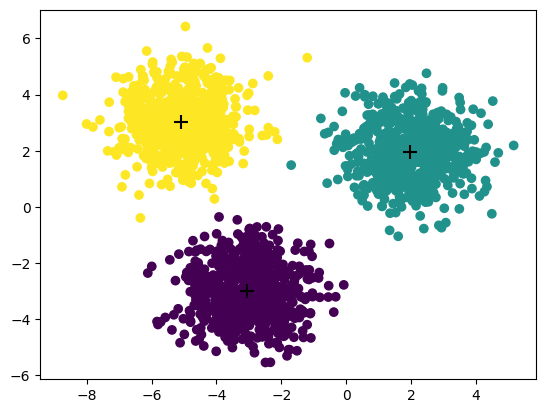

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


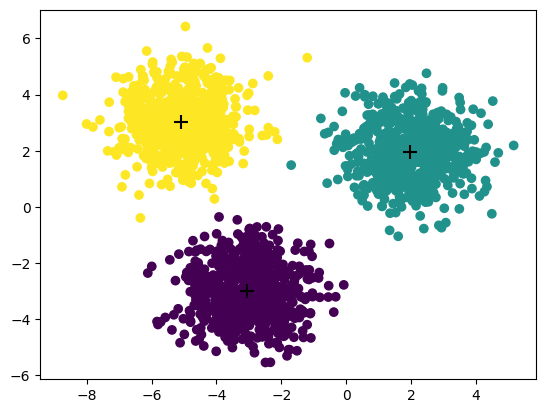

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


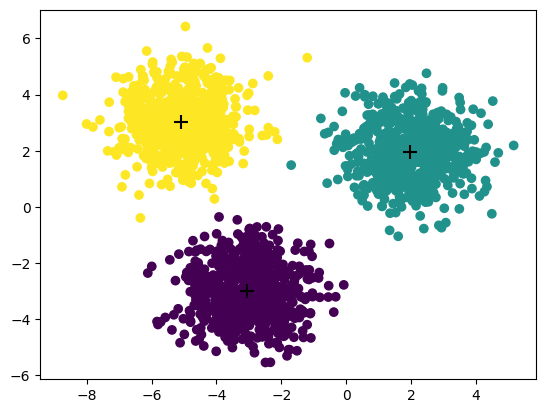

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


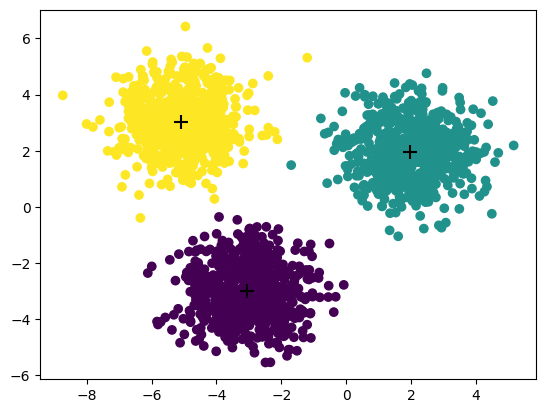

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


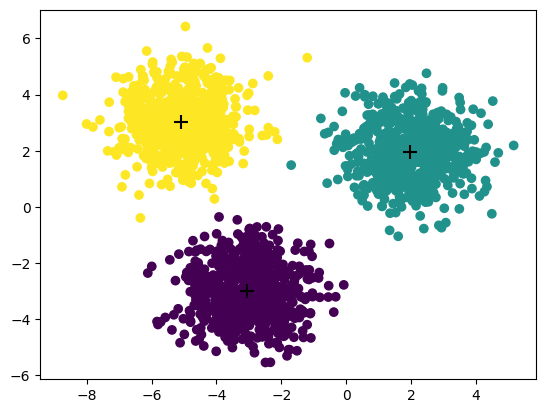

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


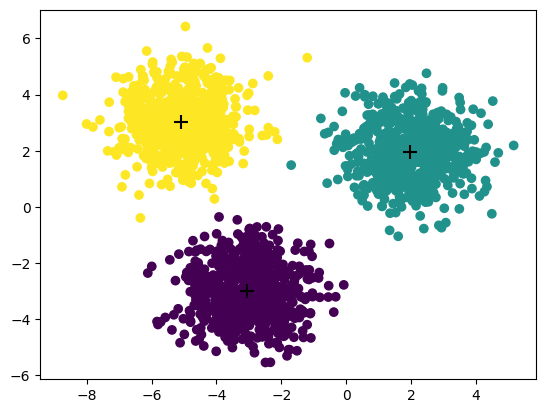

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


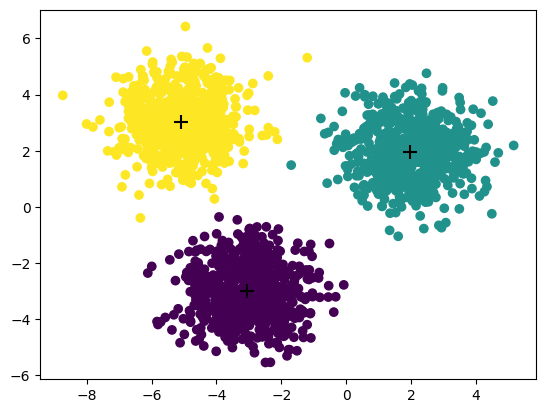

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


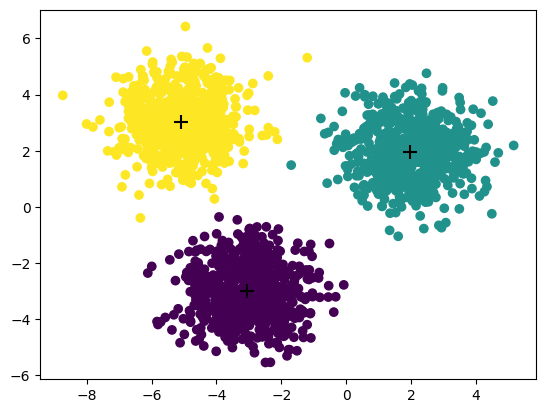

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


In [14]:
epochs = 10


for i in range(10):

  z = identify_cluster_of_each_data_point(X, cluster_centres)

  plt.scatter(X[:, 0], X[:, 1], c = z)
  plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], marker = '+', s = 100, c = 'k')
  plt.show()

  cluster_centres = compute_cluster_centres(X, z, k)
  print(cluster_centres)
